<a href="https://colab.research.google.com/github/jg4726/public-file/blob/main/BaselineModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# /usr/bin/python
# -*- coding:utf-8 -*-
import xgboost as xgb
import numpy as np
import scipy.sparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
%%time
path = 'G:/NYU/Data Science/Project/data/'
train = pd.read_feather(path+'jane_street_train.feather')
features = pd.read_csv(path+'features.csv')
print ("Data loaded!")

Data loaded!
Wall time: 1.62 s


In [ ]:
train

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390486,499,0.000000,0.000142,0.000142,0.005829,0.020342,0.015396,1,-1.649365,-1.169996,...,-1.896874,-1.260055,1.947725,-1.994399,-1.685163,-2.866165,-0.216130,-1.892048,0.901585,2390486
2390487,499,0.000000,0.000012,0.000012,-0.000935,-0.006326,-0.004718,1,2.432943,5.284504,...,-0.936553,1.064936,3.119762,-0.419796,-0.208975,-0.146749,0.730166,0.648452,2.068737,2390487
2390488,499,0.000000,0.000499,0.000499,0.007605,0.024907,0.016591,1,-0.622475,-0.963682,...,-2.956745,-0.640334,-2.279663,-0.950259,-4.388417,-1.669922,-3.288939,-1.336142,-2.814239,2390488
2390489,499,0.283405,-0.000156,-0.000156,-0.001375,-0.003702,-0.002004,-1,-1.463757,-1.107228,...,-2.035894,-1.780962,0.881246,-2.202140,-1.912601,-3.341684,-0.571188,-2.185795,0.627452,2390489


In [ ]:
features

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
0,feature_0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,feature_1,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,feature_2,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,feature_3,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,feature_4,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,feature_125,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
126,feature_126,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
127,feature_127,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
128,feature_128,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
date_trade = train[['date','ts_id']]
date_trade.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,date,ts_id
count,2390491,2390491
mean,248,1195245
std,152,690075
min,0,0
25%,104,597622
50%,254,1195245
75%,382,1792868
max,499,2390490


In [ ]:
# since the dataset is huge, we need to do some preprocessing to reduce the memeory usage at first
def memory_reduce(dataset):
    memeory_first = dataset.memory_usage().sum() / 1024**2 
    print("The original memory usage is :",memeory_first," MB")
    
    na_value = [] # we collect those cells missing value 
    for column in dataset.columns:
        if dataset[column].dtype != object:  # strings will be excluded 
            
            # set maximum and minimum
            IsInt = False
            value_max = dataset[column].max()
            value_min = dataset[column].min()
            
            # fill NaN values
            if not np.isfinite(dataset[column]).all(): 
                na_value.append(column)
                dataset[column].fillna(value_min-1,inplace=True)  
                   
            # converte the columns to int
            asint = dataset[column].fillna(0).astype(np.int64)
            result = (dataset[column] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # set the int and unassigned int datatypes
            if IsInt:
                if value_min >= 0:
                    if value_max < 255:
                        dataset[column] = dataset[column].astype(np.uint8)
                    elif value_max < 65535:
                        dataset[column] = dataset[column].astype(np.uint16)
                    elif value_max < 4294967295:
                        dataset[column] = dataset[column].astype(np.uint32)
                    else:
                        dataset[column] = dataset[column].astype(np.uint64)
                else:
                    if value_min > np.iinfo(np.int8).min and value_max < np.iinfo(np.int8).max:
                        dataset[column] = dataset[column].astype(np.int8)
                    elif value_min > np.iinfo(np.int16).min and value_max < np.iinfo(np.int16).max:
                        dataset[column] = dataset[column].astype(np.int16)
                    elif value_min > np.iinfo(np.int32).min and value_max < np.iinfo(np.int32).max:
                        dataset[column] = dataset[column].astype(np.int32)
                    elif value_min > np.iinfo(np.int64).min and value_max < np.iinfo(np.int64).max:
                        dataset[column] = dataset[column].astype(np.int64)    
            else:
                dataset[column] = dataset[column].astype(np.float32)

    print("completed")
    memory_new = dataset.memory_usage().sum() / 1024**2 
    print("Memory usage now is: ",memory_new," MB")
    return dataset, na_value

train, _ = memory_reduce(train)

The original memory usage is : 2516.843978881836  MB
completed
Memory usage now is:  1247.0233011245728  MB


In [ ]:
# the outlier list is referenced from the article "Feature importance over time for outlier detection",
# https://www.kaggle.com/snippsy/feature-importance-over-time-for-outlier-detection
outlier_list = set([2,5,19,26,29,36,37,43,63,77,87,173,262,264,268,270,276,294,347,499])
train = train[~train.date.isin(outlier_list)]

#extract the features
features = [c for c in train.columns if 'feature' in c]

#fill in NaN values
f_mean = train[features[1:]].mean()
train[features[1:]] = train[features[1:]].fillna(f_mean)

#only get those rows have actual meaning, which means weight>0
train = train[train.weight>0]

#get the action label based on the returns provided
train['action'] = ((train['resp'].values) > 0).astype('int')
train['action1'] = ((train['resp_1'].values) > 0).astype('int')
train['action2'] = ((train['resp_2'].values) > 0).astype('int')
train['action3'] = ((train['resp_3'].values) > 0).astype('int')
train['action4'] = ((train['resp_4'].values) > 0).astype('int')

X = train.loc[:, train.columns.str.contains('feature')]
y = train.loc[:, 'action3'].astype('int').values

X

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129
1,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,-29.159430,-42.881226,-0.151877,...,-5.883486,-8.471971,-1.178850,1.777472,-0.915459,2.831612,-1.417010,2.297459,-1.304614,1.898684
4,1,-3.172026,-3.093182,-0.161518,-0.128149,-0.195006,-0.143780,-29.159430,-42.881226,2.683017,...,-5.883486,-8.471971,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633
6,-1,-3.172026,-3.093182,-0.030588,-0.043175,0.097058,0.053483,-29.159430,-42.881226,-6.299415,...,-5.883486,-8.471971,0.336873,4.076447,0.614783,6.622176,0.800618,5.231595,0.361506,3.921714
7,-1,0.446050,-0.466210,0.498751,0.244116,0.412528,0.224140,-29.159430,-42.881226,0.277257,...,-5.883486,-8.471971,2.101997,4.846202,1.479875,5.261328,2.305066,4.571763,2.201537,4.429745
8,1,-3.172026,-3.093182,-0.363836,-0.291496,0.128422,0.096168,-29.159430,-42.881226,-3.727364,...,-5.883486,-8.471971,1.537913,4.785838,1.637435,6.968002,2.354338,5.825499,1.778029,4.740577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384751,1,-1.118235,-0.986171,-1.009669,-1.094186,-1.359369,-1.596287,-0.902803,-1.158092,-1.446565,...,-1.737428,-2.493737,-0.696122,1.181136,-1.446605,-2.329435,-1.780808,-0.509003,-1.041158,0.577514
2384764,-1,0.298578,0.247591,0.579482,0.497157,0.750224,0.700447,-0.100021,-0.160544,0.226302,...,-0.335387,-2.712143,-0.736166,-2.485861,-0.491737,-3.384339,-0.882045,-2.560549,-0.886979,-2.386366
2384765,-1,0.491940,1.071164,2.220871,2.781531,2.018290,2.541887,0.635700,1.003248,0.187215,...,-1.295256,-1.982884,-0.494179,0.804398,-0.992367,-1.433555,-1.052581,0.076988,-0.648629,0.602940
2384783,-1,-2.025456,-1.654791,0.356227,0.555569,0.581016,0.933056,0.269656,0.706425,-1.944691,...,-3.346034,-1.661060,-2.430799,0.668963,-2.526900,-0.952830,-3.633507,0.471338,-2.515634,1.378307


In [ ]:
y

array([0, 0, 1, ..., 1, 1, 0])

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##############LogisticRegression#############
Confusion Matrix:  [[40291 53165]
 [37545 58552]]
Accuracy : 52.15%


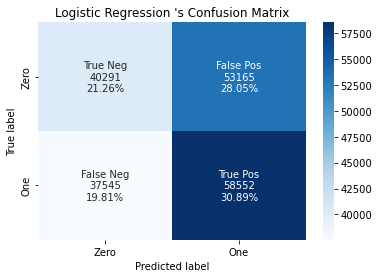

In [ ]:
#get the accuracy and confusion matrix for the models
def show_accuracy(y_test, y_pred, model):
    print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
    plot_matrix(confusion_matrix(y_test, y_pred), model)  
    print (f'Accuracy : {(accuracy_score(y_test,y_pred)):2.2%}')

def plot_matrix(matrix, model):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in matrix.flatten()/np.sum(matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(6,4))
    sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues',xticklabels=['Zero', 'One'],yticklabels=['Zero', 'One'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    title = model + ' \'s Confusion Matrix'
    plt.title(title)

#split the dataset    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

# LogisticRegression
lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train.ravel())
y_pred = lr.predict(X_test)
print ("##############LogisticRegression#############")
show_accuracy(y_test, y_pred, 'Logistic Regression')


############Random Forest ###############
Confusion Matrix:  [[23497 69959]
 [21777 74320]]
Accuracy : 51.60%


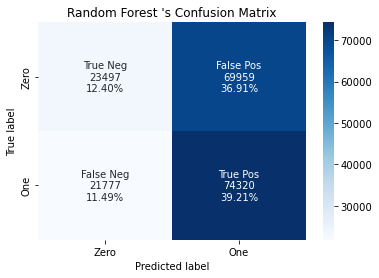

In [ ]:
#RandomForest
rnd_clf = RandomForestClassifier(n_estimators=10, max_leaf_nodes=7, n_jobs=1)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print("############Random Forest ###############")
show_accuracy(y_test, y_pred, 'Random Forest')


############Decision Tree ###############
Confusion Matrix:  [[48561 44895]
 [47428 48669]]
Accuracy : 51.29%


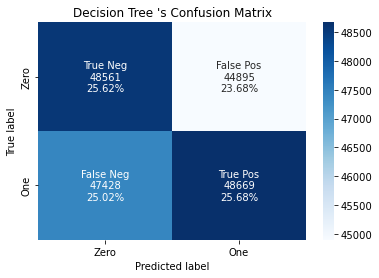

In [ ]:
#Decision Tree
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
print("############Decision Tree ###############")
show_accuracy(y_test, y_pred_gini, 'Decision Tree')
